# Importing and understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Goutham Challa\Desktop\zomato\zomato.csv")
df

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                             phone  \
0            Yes   4.1/5    775    080 42297555\r\n+91 9743772233   
1             No   4.1/5    787                      080 41714161   
2             No   3.8/5    918                    +91 9663487993   
3             No   3.7/5     88                    +91 9620009302   
4             No   3.8/5    166  +91 8026612447\r\n+91 9901210005   
...          ...     ...    ...                               ...   
51712         No  3.6 /5     27                      080 40301477   
51713         No     NaN      0                    +91 8197675843   
51714         No     NaN      0                               NaN   
51715        Yes  4.3 /5    236                      080 49652769   
51716         No  3.4 /5     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, 

In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
feature_na = []
for feature in df.columns:
    if df[feature].isnull().sum()>1:
        feature_na.append(feature)
feature_na
        
    

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [7]:
for feature in feature_na:
    print("{} has {} % of missing values".format(feature, np.round(df[feature].isnull().sum()/len(df)*100,3)))

rate has 15.034 % of missing values
phone has 2.336 % of missing values
location has 0.041 % of missing values
rest_type has 0.439 % of missing values
dish_liked has 54.292 % of missing values
cuisines has 0.087 % of missing values
approx_cost(for two people) has 0.669 % of missing values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [10]:
df[df['approx_cost(for two people)'].isnull()]

url  \
1662   https://www.zomato.com/bangalore/papa-khan-ras...   
1768   https://www.zomato.com/bangalore/innate-jp-nag...   
1795   https://www.zomato.com/bangalore/super-chefs-b...   
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   
51233  https://www.zomato.com/bangalore/mayas-kitchen...   
51247  https://www.zomato.com/bangalore/mast-kalandar...   
51271  https://www.zomato.com/bangalore/karavalli-foo...   
51641  https://www.zomato.com/bangalore/andhra-spices...   

                                                 address  \
1662   6, Abbiah Layout KC Halli Main Road, Bommanaha...   
1768   45, 14th Main, 7th phase, Puttehahalli Palya, ...   
1795   8/3, Opposite Suryadhoya Convention hall, Bann...   
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   
51233  43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...   
51247  D64, 33, 1st Floor, Sundari Armadale, Next To ...   
51271  N254-107, 1st Main Road, Near ITPL Gate 3, KIA...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   

                                 name online_order book_table    rate  votes  \
1662                  Papa Khan Rasoi           No         No     NaN      0   
1768                           Innate           No         No     NaN      0   
1795   Super Chef's (New Royal treat)           No         No     NaN      0   
3069   Super Chef's (New Royal treat)           No         No       -      0   
3774         The Hub - Ibis Bengaluru           No         No   3.9/5    237   
...                               ...          ...        ...     ...    ...   
50940                        Cinnabon           No         No  4.0 /5     80   
51233                   Mayas kitchen           No         No     NaN      0   
51247                   Mast Kalandar           No         No  2.6 /5     76   
51271            Karavalli Food Court           No         No  3.2 /5      4   
51641                   Andhra Spices           No         No  3.2 /5      4   

      phone           location      rest_type  \
1662    NaN                NaN            NaN   
1768    NaN           JP Nagar       Delivery   
1795    NaN  Bannerghatta Road    Quick Bites   
3069    NaN  Bannerghatta Road    Quick Bites   
3774    NaN       Marathahalli            Bar   
...     ...                ...            ...   
50940   NaN         Whitefield    Quick Bites   
51233   NaN         Whitefield  Casual Dining   
51247   NaN         Whitefield  Casual Dining   
51271   NaN         Whitefield  Casual Dining   
51641   NaN        Brookefield    Quick Bites   

                                              dish_liked  \
1662                                                 NaN   
1768                                                 NaN   
1795                                                 NaN   
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   
51233                                                NaN   
51247  Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...   
51271                                                NaN   
51641                                                NaN   

                                  cuisines approx_cost(for two people)  \
1662                                   NaN                         NaN   
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian  

In [11]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [12]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [13]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [14]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [15]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [16]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [17]:
df['rate'].dtype

dtype('O')

In [18]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
df['rate'].isnull().sum()

7775

In [20]:
df['rate'][0].split('/')[0]

'4.1'

In [21]:
def split(x):
    return x.split('/')[0]

In [22]:
df['rate'] = df['rate'].astype(str).apply(split)

In [23]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [24]:
df['rate'].replace('-', 0, inplace = True)
df['rate'].replace('NEW', 0, inplace = True)

In [25]:
df['rate'] = df['rate'].astype(float)

In [26]:
df['rate'].dtype

dtype('float64')

# Visualization

<AxesSubplot:>

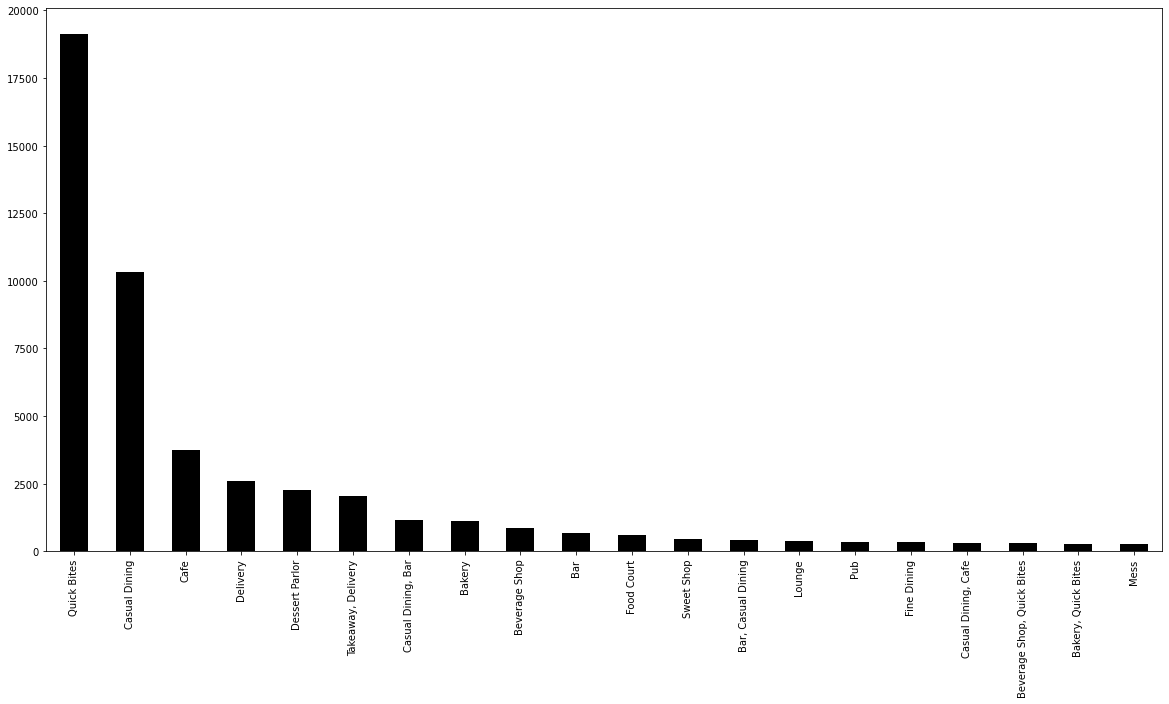

In [27]:
plt.figure(figsize=(20,10))
df['rest_type'].value_counts().nlargest(20).plot.bar(color = 'black')

In [28]:
def mark(x):
    if x in ('Quick Bites', 'Casual Dining'):
        return 'QuickBites + Casual Dining'
    else:
        return 'Others'

In [29]:
df['top_type']=df['rest_type'].apply(mark)

In [30]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    top_type  
0          Buffet    Banashankari  QuickBites + Casual Dining  
1          Buffet    Banashankari  QuickBites + Casual Dining  
2          Buffet    Banashankari                      Others  
3          Buffet    Banashankari  QuickBites + Casual Dining  
4          Buffet    Banashankari  QuickBites + Casual Dining

In [31]:
import plotly.express as px

In [32]:
values = df['top_type'].value_counts().values

In [33]:
labels = df['top_type'].value_counts().index

In [34]:
fig1 = px.pie(df, names = labels, values= values)
fig1.show()

In [35]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type'],
      dtype='object')

In [36]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
top_type                        object
dtype: object

In [37]:
rest = df.groupby('name').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()
rest

name  votes  url  \
0                                     #FeelTheROLL     14    2   
1                                       #L-81 Cafe    432    9   
2                                    #Vibes Restro      0    3   
3                                          #refuel    111    3   
4                           'Brahmins' Thatte Idli      0    1   
...                                            ...    ...  ...   
8787                                       late100      0    5   
8788                                       nu.tree   1443    8   
8789  re:cess - Hilton Bangalore Embassy GolfLinks    438    3   
8790                                    repEAT Hub      0    2   
8791                                     sCoolMeal      0    5   

      approx_cost(for two people)      rate  
0                           200.0  3.400000  
1                           400.0  3.900000  
2                           700.0       NaN  
3                           400.0  3.700000  
4                           100.0       NaN  
...                           ...       ...  
8787                        200.0       NaN  
8788                        400.0  4.314286  
8789                       1200.0  4.100000  
8790                        200.0       NaN  
8791                        300.0       NaN  

[8792 rows x 5 columns]

In [38]:
rest.columns = ['name','total_votes', 'total_unities', 'avg_approx_cost','mean_rating']
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  
0          3.4  
1          3.9  
2          NaN  
3          3.7  
4          NaN

In [39]:
rest['votes_per_unity'] = rest['total_votes']/rest['total_unities']

In [40]:
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  votes_per_unity  
0          3.4              7.0  
1          3.9             48.0  
2          NaN              0.0  
3          3.7             37.0  
4          NaN              0.0

In [41]:
popular = rest.sort_values(by = 'total_unities',ascending=False)
popular

name  total_votes  total_unities  \
1320                   Cafe Coffee Day         3089             96   
5549                            Onesta       347520             85   
3788                         Just Bake         2898             73   
2446                 Empire Restaurant       229808             71   
2577                 Five Star Chicken         3134             70   
...                                ...          ...            ...   
1900                        Cool Break           11              1   
8076       The Shake Factory Originals            8              1   
5216        Nethravathi Military Hotel            0              1   
7426  Swadisht North Indian Restaurant           23              1   
5375                Night Punjabi Folk            0              1   

      avg_approx_cost  mean_rating  votes_per_unity  
1320       844.791667     3.147191        32.177083  
5549       600.000000     4.410588      4088.470588  
3788       400.000000     3.355882        39.698630  
2446       685.211268     3.916901      3236.732394  
2577       257.857143     3.425000        44.771429  
...               ...          ...              ...  
1900       150.000000     3.400000        11.000000  
8076       200.000000     3.300000         8.000000  
5216       200.000000          NaN         0.000000  
7426       200.000000     3.200000        23.000000  
5375       200.000000          NaN         0.000000  

[8792 rows x 6 columns]

In [42]:
popular['name'].nunique()

8792

# Restaurant overview analysis

## Top most and least rated restaurants

In [43]:
popular.sort_values(by ='total_votes', ascending = False).query('total_votes > 0').head(5)

name  total_votes  total_unities  avg_approx_cost  \
5549             Onesta       347520             85       600.000000   
8269           Truffles       301059             43       900.000000   
2446  Empire Restaurant       229808             71       685.211268   
3054           Hammered       180602             47      1272.340426   
7751    The Black Pearl       172122             18      1427.777778   

      mean_rating  votes_per_unity  
5549     4.410588      4088.470588  
8269     4.595349      7001.372093  
2446     3.916901      3236.732394  
3054     4.329787      3842.595745  
7751     4.727778      9562.333333

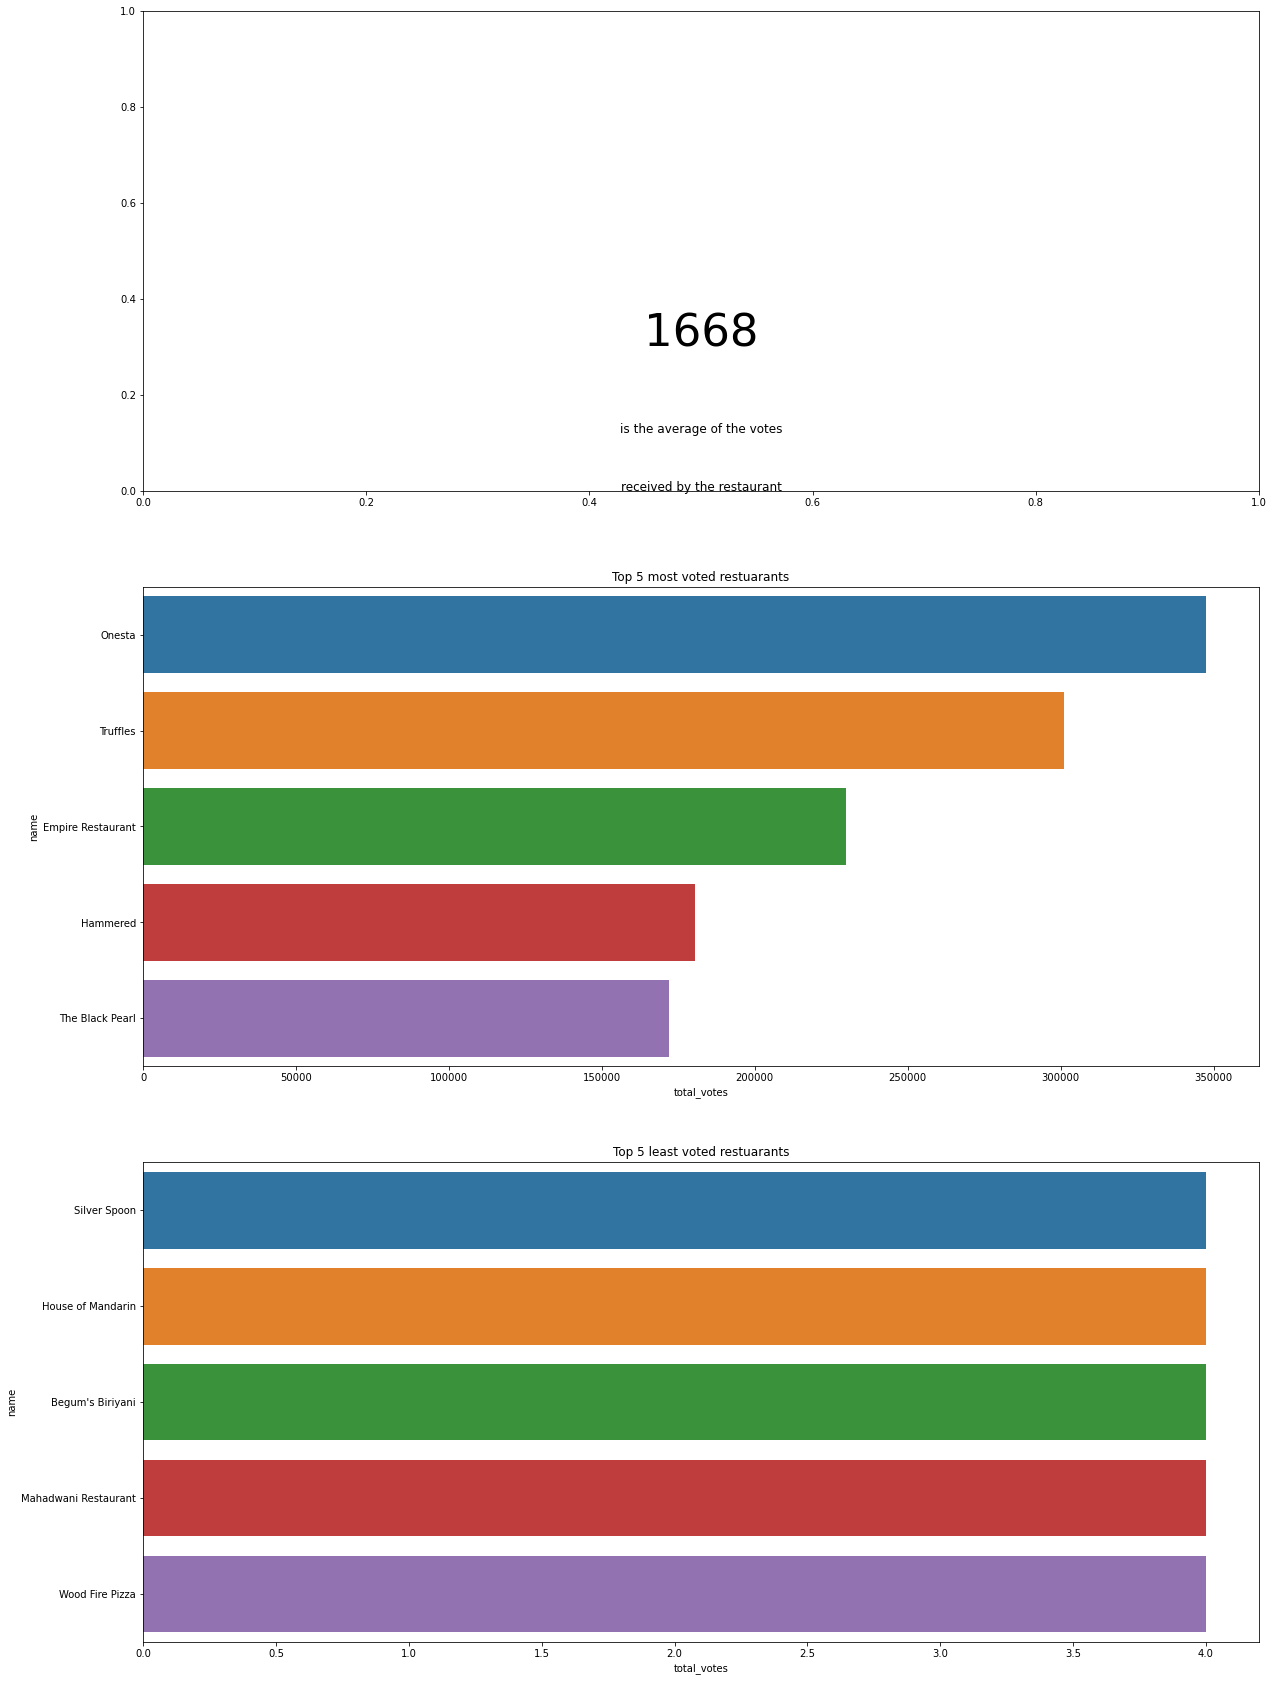

In [44]:
import seaborn as sns
fig, (ax1,ax2, ax3)=plt.subplots(3,1, figsize=(20,30))
ax1.text(0.50,0.30, int(popular['total_votes'].mean()), fontsize=45, ha='center')
ax1.text(0.50,0.12, 'is the average of the votes',fontsize=12, ha='center')
ax1.text(0.50,0.00, 'received by the restaurant',fontsize=12, ha='center');


sns.barplot(x='total_votes', y='name', data = popular.sort_values(by= 'total_votes', ascending = False).query('total_votes > 0').head(5),ax=ax2)
ax2.set_title('Top 5 most voted restuarants')


sns.barplot(x='total_votes', y='name', data = popular.sort_values(by= 'total_votes', ascending = False).query('total_votes > 0').tail(5),ax=ax3)
ax3.set_title('Top 5 least voted restuarants');

## Top most expensive and cheapest restaurants

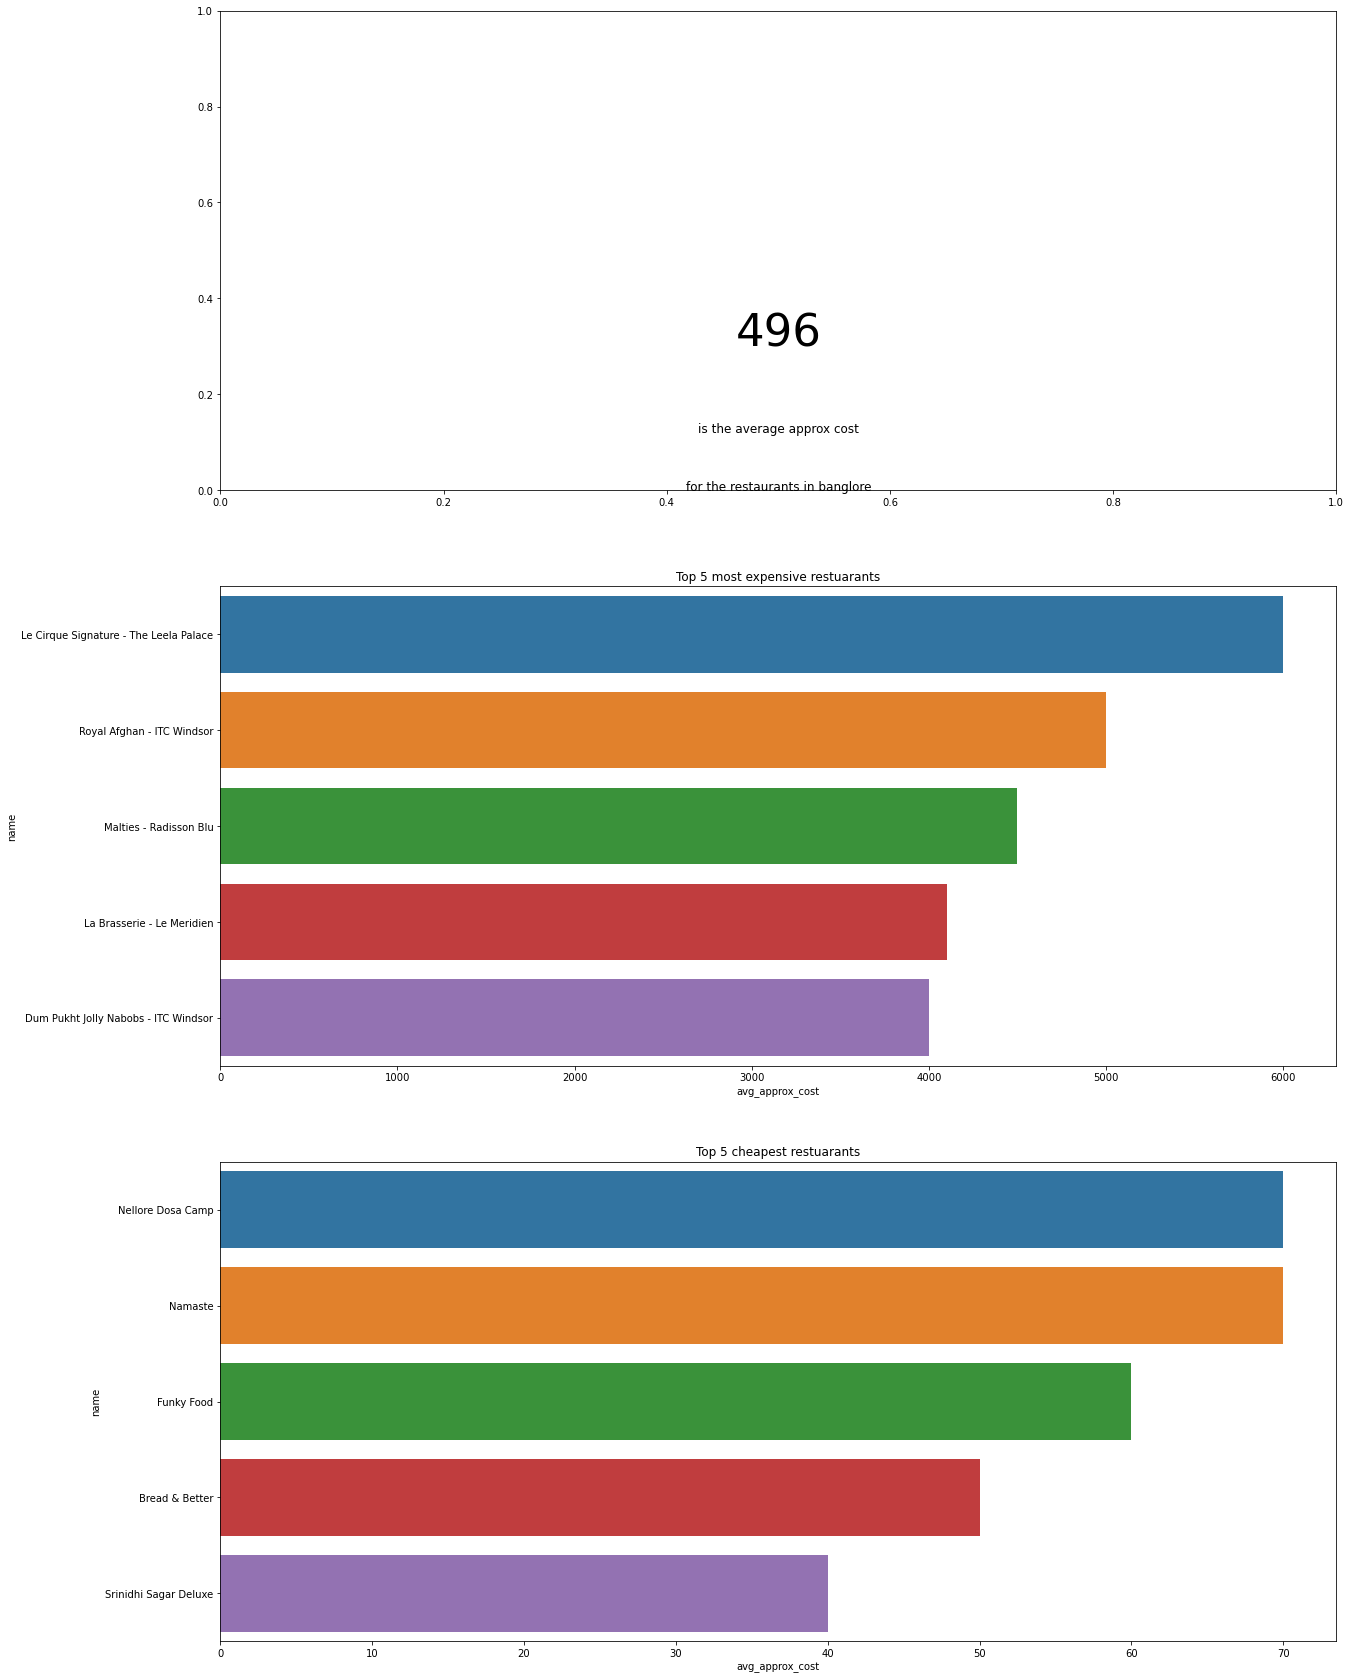

In [45]:
import seaborn as sns
fig, (ax1,ax2, ax3)=plt.subplots(3,1, figsize=(20,30))
ax1.text(0.50,0.30, int(popular['avg_approx_cost'].mean()), fontsize=45, ha='center')
ax1.text(0.50,0.12, 'is the average approx cost',fontsize=12, ha='center')
ax1.text(0.50,0.00, 'for the restaurants in banglore',fontsize=12, ha='center');


sns.barplot(x='avg_approx_cost', y='name', data = popular.sort_values(by= 'avg_approx_cost', ascending = False).query('avg_approx_cost > 0').head(5),ax=ax2)
ax2.set_title('Top 5 most expensive restuarants')


sns.barplot(x='avg_approx_cost', y='name', data = popular.sort_values(by= 'avg_approx_cost', ascending = False).query('avg_approx_cost > 0').tail(5),ax=ax3)
ax3.set_title('Top 5 cheapest restuarants');

## Percentage of restaurants offering table booking service

In [46]:
x=df['book_table'].value_counts()
labels = ['not booking', 'booking']

In [47]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [48]:
trace = go.Pie(labels = labels, values=x, hoverinfo = 'label+percent', textinfo='percent')
iplot([trace])

## Restaurants accepting online orders

In [49]:
x=df['online_order'].value_counts()
labels = ['not accepting', 'accepting']

In [50]:
chart = go.Pie(labels = labels, values=x, hoverinfo = 'label+percent', textinfo='percent')
iplot([chart])

## Find best budget restaurants

In [51]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type'],
      dtype='object')

In [52]:
filter = (df['approx_cost(for two people)']<=400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')
budget = df[filter]
budget.head()

url  \
928  https://www.zomato.com/bangalore/hiyar-majhe-k...   
934  https://www.zomato.com/bangalore/swadista-aaha...   
940  https://www.zomato.com/bangalore/swad-punjab-d...   
942  https://www.zomato.com/bangalore/roti-wala-btm...   
954  https://www.zomato.com/bangalore/litti-twist-b...   

                                               address                 name  \
928  57/1, Near Alliance University, 19th Cross, 7t...  Hiyar Majhe Kolkata   
934     947, 16th Main Road, 2nd Stage, BTM, Bangalore       Swadista Aahar   
940  324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...       Swad Punjab Da   
942  688, 7th Main, 10th Cross Main Road, 2nd Stage...            Roti Wala   
954  No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...          Litti Twist   

    online_order book_table  rate  votes                               phone  \
928          Yes         No   4.0    244  +91 9108919806\r\r\n+91 9739059571   
934          Yes         No   4.1    775  +91 9844006825\r\r\n+91 9844615361   
940          Yes         No   4.0    126                      +91 8360151853   
942          Yes         No   4.0    197                      +91 9731100002   
954          Yes         No   4.1    464                      +91 8884270523   

    location    rest_type                                         dish_liked  \
928      BTM  Quick Bites  Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...   
934      BTM  Quick Bites  Panneer Butter Masala, Idli, Masala Dosa, Vada...   
940      BTM  Quick Bites    Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry   
942      BTM  Quick Bites  Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...   
954      BTM  Quick Bites  Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...   

                                             cuisines  \
928                             Bengali, North Indian   
934  South Indian, North Indian, Chinese, Street Food   
940                                      North Indian   
942                                      North Indian   
954                              North Indian, Bihari   

     approx_cost(for two people)  \
928                        400.0   
934                        300.0   
940                        150.0   
942                        300.0   
954                        300.0   

                                          reviews_list  \
928  [('Rated 4.0', 'RATED\n  I like this restauran...   
934  [('Rated 3.0', "RATED\n  Ordered south Indian ...   
940  [('Rated 4.0', 'RATED\n  If you can visit and ...   
942  [('Rated 5.0', 'RATED\n  Well, I never had a c...   
954  [('Rated 4.0', "RATED\n  It's a great outlet t...   

                                             menu_item listed_in(type)  \
928                                                 []        Delivery   
934                                                 []        Delivery   
940  ['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...        Delivery   
942                                                 []        Delivery   
954                                                 []        Delivery   

       listed_in(city)                    top_type  
928  Bannerghatta Road  QuickBites + Casual Dining  
934  Bannerghatta Road  QuickBites + Casual Dining  
940  Bannerghatta Road  QuickBites + Casual Dining  
942  Bannerghatta Road  QuickBites + Casual Dining  
954  Bannerghatta Road  QuickBites + Casual Dining

In [53]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [54]:
def return_budget(location, restaurant_type):
    filter = (df['approx_cost(for two people)']<=400) & (df['location']==location) & (df['rate']>=4) & (df['rest_type']==restaurant_type)
    budget = df[filter]
    return (budget['name'].unique())


In [55]:
return_budget('BTM','Quick Bites')

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

# Geographical analysis
## extraction of latitude and longitude of a restaurant

In [56]:
!pip install geopy

In [57]:
from geopy.geocoders import Nominatim

In [58]:
geolocator = Nominatim(user_agent = 'app')

In [59]:
data = df['name'][2]
data

'San Churro Cafe'

In [60]:
data = geolocator.geocode(data)

In [61]:
data.latitude

-33.751238

In [62]:
data.longitude

150.6944211

In [63]:
df.shape

(51717, 18)

In [64]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type'],
      dtype='object')

In [65]:
df['location'].nunique()

93

In [66]:
locations = pd.DataFrame({'name':df['location'].unique()})
locations

name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [67]:
lat =[]
lon=[]
for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [68]:
locations['Latitude'] = lat
locations['longitude'] = lon

In [69]:
locations.head()

name   Latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [70]:
rest_location = df['location'].value_counts().reset_index()

In [71]:
rest_location.columns=['name','count']
rest_location

name  count
0                     BTM   5124
1                     HSR   2523
2   Koramangala 5th Block   2504
3                JP Nagar   2235
4              Whitefield   2144
..                    ...    ...
88         West Bangalore      6
89              Yelahanka      6
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

In [72]:
Restaurant_locations = rest_location.merge(locations, on='name').dropna()

In [73]:
Restaurant_locations

name  count   Latitude   longitude
0                     BTM   5124  45.954851 -112.496595
1                     HSR   2523  18.147500   41.538889
2   Koramangala 5th Block   2504  12.934377   77.628415
3                JP Nagar   2235  12.265594   76.646540
4              Whitefield   2144  44.373058  -71.611858
..                    ...    ...        ...         ...
88         West Bangalore      6  13.001129   77.632562
89              Yelahanka      6  13.100698   77.596345
90                 Jakkur      3  13.078474   77.606894
91   Rajarajeshwari Nagar      2  12.927441   77.515522
92                 Peenya      1  13.032942   77.527325

[92 rows x 4 columns]

In [74]:
!pip install folium

In [75]:
import folium
from folium.plugins import HeatMap

In [76]:
basemap = folium.Map(location=[12.97,77.59])
basemap

In [77]:
HeatMap(data = Restaurant_locations[['Latitude','longitude','count']]).add_to(basemap)

In [78]:
basemap

## Analysis of customer reviews using wordcloud

In [79]:
!pip install wordcloud

In [80]:
from wordcloud import WordCloud, STOPWORDS

In [81]:
data = df[df['rest_type']=='Quick Bites']
data

url  \
3      https://www.zomato.com/bangalore/addhuri-udupi...   
31     https://www.zomato.com/bangalore/foodiction-1-...   
34     https://www.zomato.com/bangalore/faasos-banash...   
36     https://www.zomato.com/bangalore/fast-and-fres...   
39     https://www.zomato.com/bangalore/maruthi-davan...   
...                                                  ...   
51641  https://www.zomato.com/bangalore/andhra-spices...   
51642  https://www.zomato.com/bangalore/basaveshwara-...   
51643  https://www.zomato.com/bangalore/new-ambur-bir...   
51644  https://www.zomato.com/bangalore/punjabi-thadk...   
51645  https://www.zomato.com/bangalore/raapchick-bro...   

                                                 address  \
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36     32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39     556/A, Water Tank Road, 3rd Stage, Banashankar...   
...                                                  ...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   
51642  Nanjudeshwari complex, Oppsite Brookefield Mal...   
51643  AECS Layout, ITPL Main Road, Brookefield, Bang...   
51644  7/3, ASK Tower, Kundanahalli Gate, Next to Bat...   
51645  Opposite Brookefield Mall, Kundanhalli, Brooke...   

                               name online_order book_table  rate  votes  \
3             Addhuri Udupi Bhojana           No         No   3.7     88   
31                       Foodiction          Yes         No   2.8    506   
34                           Faasos          Yes         No   4.2    415   
36                   Fast And Fresh          Yes         No   2.8     91   
39     Maruthi Davangere Benne Dosa          Yes         No   4.0     17   
...                             ...          ...        ...   ...    ...   
51641                 Andhra Spices           No         No   3.2      4   
51642        Basaveshwara Khanavali           No         No   NaN      0   
51643             New Ambur Biryani           No         No   NaN      0   
51644                Punjabi Thadka           No         No   NaN      0   
51645                     Raapchick          Yes         No   3.6     49   

                                phone      location    rest_type  \
3                      +91 9620009302  Banashankari  Quick Bites   
31                     +91 9916107070  Banashankari  Quick Bites   
34                     +91 7700020020  Banashankari  Quick Bites   
36                     +91 9742974232  Banashankari  Quick Bites   
39                     +91 9019563485  Banashankari  Quick Bites   
...                               ...           ...          ...   
51641                             NaN   Brookefield  Quick Bites   
51642  +91 9740912864\n+91 7353747430   Brookefield  Quick Bites   
51643                  +91 9443087893   Brookefield  Quick Bites   
51644  +91 7338330336\n+91 9591568221   Brookefield  Quick Bites   
51645    080 41717785\n+91 9571153004   Brookefield  Quick Bites   

                                              dish_liked  \
3                                            Masala Dosa   
31     Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                   NaN   
39                                                   NaN   
...                                                  ...   
51641                                                NaN   
51642                                                NaN   
51643                                                NaN   
51644                                                NaN   
51645                                            Burgers   

                                       cuisines  approx_cost(for two people)  \
3                    South Indian, North Indian                        300.0   


In [82]:
data['dish_liked'].isnull().sum()

13843

In [83]:
dishes = ''
    
    
    
for word in data['dish_liked'].dropna():
    words= word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
    dishes = dishes+' '.join(words)+' '
    

In [84]:
dishes

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

In [85]:
stopwords = set(STOPWORDS)

In [86]:
wordcloud= WordCloud(stopwords=stopwords, width = 1500, height = 1500 ).generate(dishes)

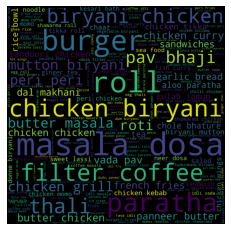

In [87]:
plt.imshow(wordcloud)
plt.axis('off');

In [88]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type'],
      dtype='object')

In [89]:
data = df['reviews_list'][0]
data

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [90]:
data = data.lower()

In [91]:
import re

In [92]:
data2 = re.sub('[^a-zA-Z]',' ', data)
data2

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [93]:
data3 = re.sub('rated', ' ', data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [94]:
data4 = re.sub('x',' ',data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [95]:
data5 = re.sub(' +', ' ', data4)
data5

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

In [96]:
dataset = df[df['rest_type']=='Quick Bites']
dataset

url  \
3      https://www.zomato.com/bangalore/addhuri-udupi...   
31     https://www.zomato.com/bangalore/foodiction-1-...   
34     https://www.zomato.com/bangalore/faasos-banash...   
36     https://www.zomato.com/bangalore/fast-and-fres...   
39     https://www.zomato.com/bangalore/maruthi-davan...   
...                                                  ...   
51641  https://www.zomato.com/bangalore/andhra-spices...   
51642  https://www.zomato.com/bangalore/basaveshwara-...   
51643  https://www.zomato.com/bangalore/new-ambur-bir...   
51644  https://www.zomato.com/bangalore/punjabi-thadk...   
51645  https://www.zomato.com/bangalore/raapchick-bro...   

                                                 address  \
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36     32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39     556/A, Water Tank Road, 3rd Stage, Banashankar...   
...                                                  ...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   
51642  Nanjudeshwari complex, Oppsite Brookefield Mal...   
51643  AECS Layout, ITPL Main Road, Brookefield, Bang...   
51644  7/3, ASK Tower, Kundanahalli Gate, Next to Bat...   
51645  Opposite Brookefield Mall, Kundanhalli, Brooke...   

                               name online_order book_table  rate  votes  \
3             Addhuri Udupi Bhojana           No         No   3.7     88   
31                       Foodiction          Yes         No   2.8    506   
34                           Faasos          Yes         No   4.2    415   
36                   Fast And Fresh          Yes         No   2.8     91   
39     Maruthi Davangere Benne Dosa          Yes         No   4.0     17   
...                             ...          ...        ...   ...    ...   
51641                 Andhra Spices           No         No   3.2      4   
51642        Basaveshwara Khanavali           No         No   NaN      0   
51643             New Ambur Biryani           No         No   NaN      0   
51644                Punjabi Thadka           No         No   NaN      0   
51645                     Raapchick          Yes         No   3.6     49   

                                phone      location    rest_type  \
3                      +91 9620009302  Banashankari  Quick Bites   
31                     +91 9916107070  Banashankari  Quick Bites   
34                     +91 7700020020  Banashankari  Quick Bites   
36                     +91 9742974232  Banashankari  Quick Bites   
39                     +91 9019563485  Banashankari  Quick Bites   
...                               ...           ...          ...   
51641                             NaN   Brookefield  Quick Bites   
51642  +91 9740912864\n+91 7353747430   Brookefield  Quick Bites   
51643                  +91 9443087893   Brookefield  Quick Bites   
51644  +91 7338330336\n+91 9591568221   Brookefield  Quick Bites   
51645    080 41717785\n+91 9571153004   Brookefield  Quick Bites   

                                              dish_liked  \
3                                            Masala Dosa   
31     Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                   NaN   
39                                                   NaN   
...                                                  ...   
51641                                                NaN   
51642                                                NaN   
51643                                                NaN   
51644                                                NaN   
51645                                            Burgers   

                                       cuisines  approx_cost(for two people)  \
3                    South Indian, North Indian                        300.0   


In [97]:
total_review = ' '

for review in dataset['reviews_list']:
    review.lower()
    review = re.sub('[^a-zA-Z]',' ', review)
    review = re.sub('rated', ' ', review)
    review = re.sub('x',' ',review)
    review = re.sub(' +', ' ', review)
    total_review = total_review + str(review)

In [98]:
wordcloud2 = WordCloud(stopwords = stopwords, width=1500, height= 1500).generate(total_review)

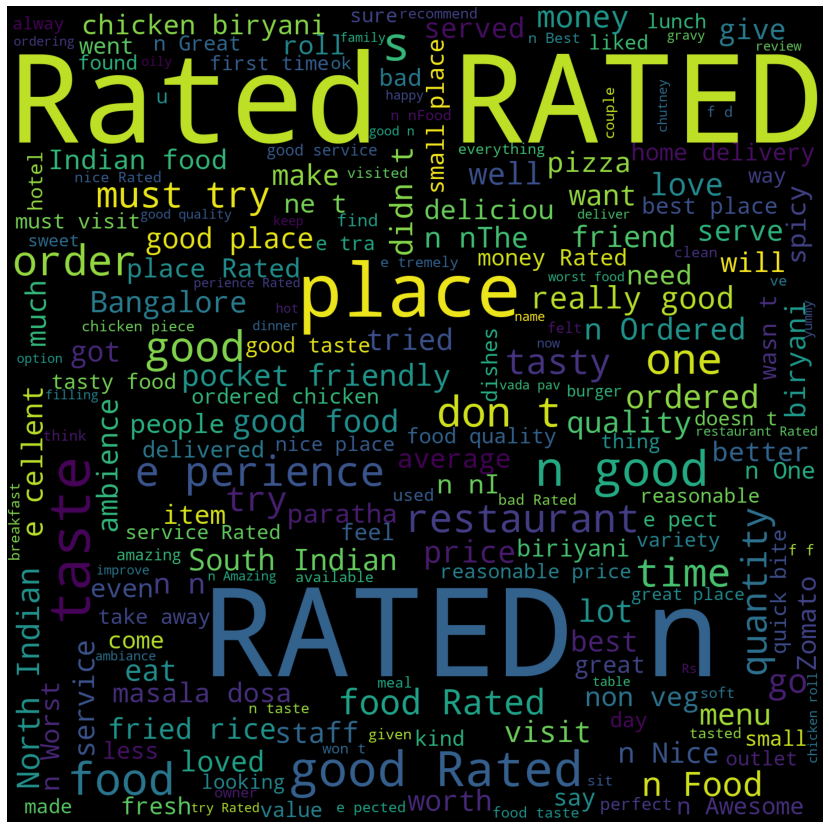

In [99]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud2)
plt.axis('off');

# Preparing data for machine learning

In [100]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    top_type  
0          Buffet    Banashankari  QuickBites + Casual Dining  
1          Buffet    Banashankari  QuickBites + Casual Dining  
2          Buffet    Banashankari                      Others  
3          Buffet    Banashankari  QuickBites + Casual Dining  
4          Buffet    Banashankari  QuickBites + Casual Dining

In [101]:
def assign(x):
    if x>0:
        return 1
    else:
        return 0

In [102]:
df['rated'] = df['rate'].apply(assign)

In [103]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type', 'rated'],
      dtype='object')

In [104]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [105]:
new_restaurants = df[df['rated']==0]
train_val_restaurants = df.query('rated==1')

In [106]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    top_type  rated  
0          Buffet    Banashankari  QuickBites + Casual Dining      1  
1          Buffet    Banashankari  QuickBites + Casual Dining      1  
2          Buffet    Banashankari                      Others      1  
3          Buffet    Banashankari  QuickBites + Casual Dining      1  
4          Buffet    Banashankari  QuickBites + Casual Dining      1

In [107]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [108]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type', 'rated'],
      dtype='object')

In [109]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [110]:
threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x:1 if x>=threshold else 0)

In [111]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    top_type  rated  target  
0          Buffet    Banashankari  QuickBites + Casual Dining      1       1  
1          Buffet    Banashankari  QuickBites + Casual Dining      1       1  
2          Buffet    Banashankari                      Others      1       1  
3          Buffet    Banashankari  QuickBites + Casual Dining      1       0  
4          Buffet    Banashankari  QuickBites + Casual Dining      1       1

In [112]:
x = train_val_restaurants['target'].value_counts()
x

0    21421
1    20244
Name: target, dtype: int64

In [113]:
labels = x.index
labels

Int64Index([0, 1], dtype='int64')

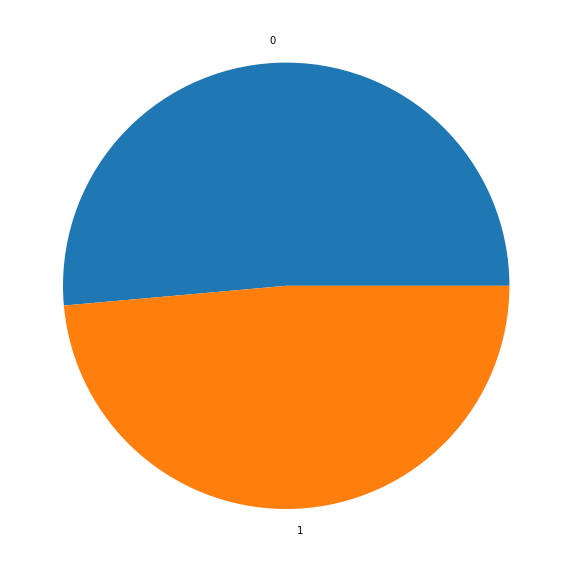

In [114]:
plt.figure(figsize=(10,15))
plt.pie(x, labels=labels);

## feature extraction

In [115]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    top_type  rated  target  
0          Buffet    Banashankari  QuickBites + Casual Dining      1       1  
1          Buffet    Banashankari  QuickBites + Casual Dining      1       1  
2          Buffet    Banashankari                      Others      1       1  
3          Buffet    Banashankari  QuickBites + Casual Dining      1       0  
4          Buffet    Banashankari  QuickBites + Casual Dining      1       1

In [116]:
len(train_val_restaurants['cuisines'][0].split(','))

3

In [117]:
def count(x):
    return len(x.split(','))
    

In [118]:
train_val_restaurants['total_cuisine'] = train_val_restaurants['cuisines'].astype(str).apply(count)

In [119]:
train_val_restaurants['total_types'] = train_val_restaurants['rest_type'].astype(str).apply(count)

In [120]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  ... approx_cost(for two people)  \
0  Banashankari        Casual Dining  ...                       800.0   
1  Banashankari        Casual Dining  ...                       800.0   
2  Banashankari  Cafe, Casual Dining  ...                       800.0   
3  Banashankari          Quick Bites  ...                       300.0   
4  Basavanagudi        Casual Dining  ...                       600.0   

                                        reviews_list  menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...         []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...         []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...         []   
3  [('Rated 4.0', "RATED\n  Great food and proper...         []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...         []   

  listed_in(type) listed_in(city)                    top_type rated target  \
0          Buffet    Banashankari  QuickBites + Casual Dining     1      1   
1          Buffet    Banashankari  QuickBites + Casual Dining     1      1   
2          Buffet    Banashankari                      Others     1      1   
3          Buffet    Banashankari  QuickBites + Casual Dining     1      0   
4          Buffet    Banashankari  QuickBites + Casual Dining     1      1   

   total_cuisine  total_types  
0              3            1  
1              3            1  
2              3            2  
3              2            1  
4              2            1  

[5 rows x 22 columns]

In [121]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type', 'rated', 'target',
       'total_cuisine', 'total_types'],
      dtype='object')

In [122]:
imp_features = [ 'online_order', 'book_table',
        'location', 'rest_type', 'approx_cost(for two people)','listed_in(city)', 'listed_in(city)','target',
       'total_cuisine', 'total_types']

In [123]:
data = train_val_restaurants[imp_features]

In [124]:
data.shape

(41665, 10)

In [125]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(city)                  0
listed_in(city)                  0
target                           0
total_cuisine                    0
total_types                      0
dtype: int64

In [126]:
data.dropna(how='any',inplace = True)

In [127]:
data.shape

(41271, 10)

In [128]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(city)                 object
listed_in(city)                 object
target                           int64
total_cuisine                    int64
total_types                      int64
dtype: object

In [139]:
cat_col = []

for col in data.columns:
    if data[col].dtype=='O':
        cat_col.append(col)
cat_col

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [135]:
!pip install pandas